# All-NBA Classificator

First of all, I will focus on All-NBA team predictions but my analyst will also consider All-Defensive and All-Rookie teams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
end_of_season_teams = pd.read_csv(r'C:\Users\tomai\Downloads\End of Season Teams.csv')
player_per_game = pd.read_csv(r'C:\Users\tomai\Downloads\Player Per Game.csv.zip')
player_play_by_play = pd.read_csv(r'C:\Users\tomai\Downloads\Player Play By Play.csv.zip')
team_summaries = pd.read_csv(r'C:\Users\tomai\Downloads\Team Summaries.csv')

In [3]:
# I will focus on NBA between 1980 and 2023
end_of_season_teams = end_of_season_teams[end_of_season_teams['season'] > 1980]
player_per_game = player_per_game[(player_per_game['season'] > 1980) & (player_per_game['season'] < 2023)]
player_play_by_play = player_play_by_play[(player_play_by_play['season'] > 1980) & (player_play_by_play['season'] < 2023)]
team_summaries = team_summaries[(team_summaries['season'] > 1980) & (team_summaries['season'] < 2023)]

In [4]:
end_of_season_teams.head()

,season,lg,type,number_tm,player,position,seas_id,player_id,birth_year,tm,age
0,2022,NBA,All-Defense,1st,Giannis Antetokounmpo,NaN,29918,4164,NaN,MIL,27
1,2022,NBA,All-Defense,1st,Jaren Jackson Jr.,NaN,29991,4632,NaN,MEM,22
2,2022,NBA,All-Defense,1st,Marcus Smart,NaN,30183,4275,NaN,BOS,27
3,2022,NBA,All-Defense,1st,Mikal Bridges,NaN,30205,4658,NaN,PHO,25
4,2022,NBA,All-Defense,1st,Rudy Gobert,NaN,30313,4199,NaN,UTA,29


In [5]:
player_per_game.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
1256,29646,2022,4219,Aaron Gordon,NaN,PF,26.0,8,NBA,DEN,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1257,29647,2022,4899,Aaron Henry,NaN,SF,22.0,1,NBA,PHI,...,NaN,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
1258,29648,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,TOT,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
1259,29649,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,WAS,...,0.800,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
1260,29650,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,PHO,...,0.939,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8


In [6]:
player_play_by_play.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,offensive_foul_drawn,points_generated_by_assists,and1,fga_blocked
1256,29646,2022,4219,Aaron Gordon,NaN,PF,26,8,NBA,DEN,...,9.0,48,39,55,27,110,6.0,436,33,52
1257,29647,2022,4899,Aaron Henry,NaN,SF,22,1,NBA,PHI,...,-54.1,1,0,2,0,0,0.0,0,0,2
1258,29648,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,TOT,...,-3.2,42,16,41,3,29,9.0,370,7,18
1259,29649,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,WAS,...,-4.0,19,12,28,2,15,7.0,187,3,10
1260,29650,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,PHO,...,-1.5,23,4,13,1,14,2.0,183,4,8


In [7]:
team_summaries.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
62,2022,NBA,Atlanta Hawks,ATL,True,26.1,43.0,39.0,45.0,37.0,...,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
63,2022,NBA,Boston Celtics,BOS,True,26.1,51.0,31.0,59.0,23.0,...,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
64,2022,NBA,Brooklyn Nets,BRK,True,29.1,44.0,38.0,43.0,39.0,...,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
65,2022,NBA,Chicago Bulls,CHI,True,26.3,46.0,36.0,40.0,42.0,...,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
66,2022,NBA,Charlotte Hornets,CHO,False,25.5,43.0,39.0,42.0,40.0,...,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


In [8]:
end_of_season_teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1404
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1405 non-null   int64  
 1   lg          1405 non-null   object 
 2   type        1405 non-null   object 
 3   number_tm   1405 non-null   object 
 4   player      1405 non-null   object 
 5   position    590 non-null    object 
 6   seas_id     1405 non-null   int64  
 7   player_id   1405 non-null   int64  
 8   birth_year  44 non-null     float64
 9   tm          1405 non-null   object 
 10  age         1405 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 131.7+ KB


In [9]:
player_per_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22110 entries, 1256 to 23365
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        22110 non-null  int64  
 1   season         22110 non-null  int64  
 2   player_id      22110 non-null  int64  
 3   player         22110 non-null  object 
 4   birth_year     553 non-null    float64
 5   pos            22110 non-null  object 
 6   age            22110 non-null  float64
 7   experience     22110 non-null  int64  
 8   lg             22110 non-null  object 
 9   tm             22110 non-null  object 
 10  g              22110 non-null  int64  
 11  gs             21770 non-null  float64
 12  mp_per_game    22110 non-null  float64
 13  fg_per_game    22110 non-null  float64
 14  fga_per_game   22110 non-null  float64
 15  fg_percent     21994 non-null  float64
 16  x3p_per_game   22110 non-null  float64
 17  x3pa_per_game  22110 non-null  float64
 18  x3p_perc

In [10]:
player_play_by_play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15372 entries, 1256 to 16627
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seas_id                           15372 non-null  int64  
 1   season                            15372 non-null  int64  
 2   player_id                         15372 non-null  int64  
 3   player                            15372 non-null  object 
 4   birth_year                        195 non-null    float64
 5   pos                               15372 non-null  object 
 6   age                               15372 non-null  int64  
 7   experience                        15372 non-null  int64  
 8   lg                                15372 non-null  object 
 9   tm                                15372 non-null  object 
 10  g                                 15372 non-null  int64  
 11  mp                                15372 non-null  int64  
 12  pg_per

In [11]:
team_summaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, 62 to 1275
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1214 non-null   int64  
 1   lg                1214 non-null   object 
 2   team              1214 non-null   object 
 3   abbreviation      1172 non-null   object 
 4   playoffs          1214 non-null   bool   
 5   age               1214 non-null   float64
 6   w                 1172 non-null   float64
 7   l                 1172 non-null   float64
 8   pw                1214 non-null   float64
 9   pl                1214 non-null   float64
 10  mov               1214 non-null   float64
 11  sos               1214 non-null   float64
 12  srs               1214 non-null   float64
 13  o_rtg             1214 non-null   float64
 14  d_rtg             1214 non-null   float64
 15  n_rtg             1172 non-null   float64
 16  pace              1214 non-null   float64
 17 

In [12]:
#I have to delete a lot of columns which will be not usefull for my data analyst and for model availibility
end_of_season_teams = end_of_season_teams[['season','player','type','tm']]
player_per_game = player_per_game.drop(['seas_id','pos','player_id','lg','birth_year','fg_percent','x3p_percent','ft_percent', 'x2p_percent','e_fg_percent',],axis=1)
player_play_by_play = player_play_by_play.drop(['seas_id','pos','player_id','lg','birth_year','pg_percent', 'sg_percent', 'sf_percent', 'pf_percent', 'c_percent','offensive_foul_drawn'],axis=1)
team_summaries = team_summaries[['season', 'team', 'playoffs', 'w', 'l','o_rtg', 'd_rtg','abbreviation']]

In [13]:
end_of_season_teams.head()

,season,player,type,tm
0,2022,Giannis Antetokounmpo,All-Defense,MIL
1,2022,Jaren Jackson Jr.,All-Defense,MEM
2,2022,Marcus Smart,All-Defense,BOS
3,2022,Mikal Bridges,All-Defense,PHO
4,2022,Rudy Gobert,All-Defense,UTA


In [14]:
player_per_game.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,fta_per_game,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
1256,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,3.1,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1257,2022,Aaron Henry,22.0,1,PHI,6,0.0,2.8,0.2,0.8,...,0.0,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
1258,2022,Aaron Holiday,25.0,4,TOT,63,15.0,16.2,2.4,5.4,...,1.1,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
1259,2022,Aaron Holiday,25.0,4,WAS,41,14.0,16.2,2.4,5.2,...,0.9,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
1260,2022,Aaron Holiday,25.0,4,PHO,22,1.0,16.3,2.3,5.6,...,1.5,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8


In [15]:
player_play_by_play.head()

,season,player,age,experience,tm,g,mp,on_court_plus_minus_per_100_poss,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,points_generated_by_assists,and1,fga_blocked
1256,2022,Aaron Gordon,26,8,DEN,75,2376,5.9,9.0,48,39,55,27,110,436,33,52
1257,2022,Aaron Henry,22,1,PHI,6,17,-51.1,-54.1,1,0,2,0,0,0,0,2
1258,2022,Aaron Holiday,25,4,TOT,63,1021,-2.1,-3.2,42,16,41,3,29,370,7,18
1259,2022,Aaron Holiday,25,4,WAS,41,663,-6.6,-4.0,19,12,28,2,15,187,3,10
1260,2022,Aaron Holiday,25,4,PHO,22,358,6.4,-1.5,23,4,13,1,14,183,4,8


In [16]:
team_summaries.head()

,season,team,playoffs,w,l,o_rtg,d_rtg,abbreviation
62,2022,Atlanta Hawks,True,43.0,39.0,116.5,114.9,ATL
63,2022,Boston Celtics,True,51.0,31.0,114.4,106.9,BOS
64,2022,Brooklyn Nets,True,44.0,38.0,113.6,112.8,BRK
65,2022,Chicago Bulls,True,46.0,36.0,113.2,113.6,CHI
66,2022,Charlotte Hornets,False,43.0,39.0,114.1,113.7,CHO


In [17]:
#This doesn't make sense but shows the League Average Team so I will delete it 
#team_summaries.groupby('team').mean()

In [18]:
team_summaries = team_summaries[team_summaries['team'] != 'League Average']

In [19]:
# Changing table to be grouped for players
end_of_season_teams = end_of_season_teams.groupby(['season','player']).sum().reset_index()

In [20]:
end_of_season_teams.head()

,season,player,type,tm
0,1981,Adrian Dantley,All-NBA,UTA
1,1981,Bobby Jones,All-Defense,PHI
2,1981,Caldwell Jones,All-Defense,PHI
3,1981,Dan Roundfield,All-Defense,ATL
4,1981,Darrell Griffith,All-Rookie,UTA


In [21]:
#Joining tables 
player_info = pd.merge(player_per_game,player_play_by_play, how='inner', on=['season', 'player', 'age', 'experience', 'tm', 'g'])
player_info.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,on_court_plus_minus_per_100_poss,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,points_generated_by_assists,and1,fga_blocked
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,5.9,9.0,48,39,55,27,110,436,33,52
1,2022,Aaron Henry,22.0,1,PHI,6,0.0,2.8,0.2,0.8,...,-51.1,-54.1,1,0,2,0,0,0,0,2
2,2022,Aaron Holiday,25.0,4,TOT,63,15.0,16.2,2.4,5.4,...,-2.1,-3.2,42,16,41,3,29,370,7,18
3,2022,Aaron Holiday,25.0,4,WAS,41,14.0,16.2,2.4,5.2,...,-6.6,-4.0,19,12,28,2,15,187,3,10
4,2022,Aaron Holiday,25.0,4,PHO,22,1.0,16.3,2.3,5.6,...,6.4,-1.5,23,4,13,1,14,183,4,8


In [22]:
# Creating dummy variables for numeric input
awards  = pd.get_dummies(end_of_season_teams['type'])
end_of_season_teams = pd.concat([end_of_season_teams, awards],axis=1)

In [23]:
# Adding awards into player's table
basketballers = pd.merge(player_info,end_of_season_teams[['season','player','All-Defense','All-NBA','All-Rookie']], how='left', on=['season','player'])

In [24]:
# With this knowledge we can check if there is a player who had won every award in one year
basketballers[(basketballers['All-NBA']==1) & (basketballers['All-Defense']==1)&(basketballers['All-Rookie']==1)]['player']

Series([], Name: player, dtype: object)

In [25]:
nba_data = pd.merge(basketballers,team_summaries,how='inner',left_on=['season','tm'],right_on=['season','abbreviation'])

In [26]:
# columns now might be duplicated so I will drop them 
nba_data.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,All-Defense,All-NBA,All-Rookie,team,playoffs,w,l,o_rtg,d_rtg,abbreviation
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
1,2022,Austin Rivers,29.0,10,DEN,67,18.0,22.1,2.2,5.2,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
2,2022,Bol Bol,22.0,3,DEN,14,0.0,5.8,1.1,1.9,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
3,2022,Bones Hyland,21.0,1,DEN,69,4.0,19.0,3.3,8.3,...,False,False,True,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
4,2022,Bryn Forbes,28.0,6,DEN,35,1.0,17.4,2.9,6.9,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN


In [27]:
nba_data.columns

Index(['season', 'player', 'age', 'experience', 'tm', 'g', 'gs', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'x3p_per_game', 'x3pa_per_game',
       'x2p_per_game', 'x2pa_per_game', 'ft_per_game', 'fta_per_game',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'mp', 'on_court_plus_minus_per_100_poss',
       'net_plus_minus_per_100_poss', 'bad_pass_turnover',
       'lost_ball_turnover', 'shooting_foul_committed',
       'offensive_foul_committed', 'shooting_foul_drawn',
       'points_generated_by_assists', 'and1', 'fga_blocked', 'All-Defense',
       'All-NBA', 'All-Rookie', 'team', 'playoffs', 'w', 'l', 'o_rtg', 'd_rtg',
       'abbreviation'],
      dtype='object')

In [28]:
nba_data = nba_data.drop(['abbreviation','team'],axis=1)

# Missing data

In [29]:
nba_data.isna().sum()

season                                  0
player                                  0
age                                     0
experience                              0
tm                                      0
g                                       0
gs                                      0
mp_per_game                             0
fg_per_game                             0
fga_per_game                            0
x3p_per_game                            0
x3pa_per_game                           0
x2p_per_game                            0
x2pa_per_game                           0
ft_per_game                             0
fta_per_game                            0
orb_per_game                            0
drb_per_game                            0
trb_per_game                            0
ast_per_game                            0
stl_per_game                            0
blk_per_game                            0
tov_per_game                            0
pf_per_game                       

In [30]:
#There are few nulls especially in All tables, I will replace them with 0, and other nulls I will just drop cause its propably irrelevant players

In [31]:
nba_data[nba_data['on_court_plus_minus_per_100_poss'].isna() == True]

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,and1,fga_blocked,All-Defense,All-NBA,All-Rookie,playoffs,w,l,o_rtg,d_rtg
1971,2019,Jawun Evans,22.0,2,OKC,1,0.0,1.0,0.0,1.0,...,0,0,NaN,NaN,NaN,True,49.0,33.0,110.3,107.0
5555,2013,Damion James,25.0,3,BRK,2,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,49.0,33.0,108.2,106.2
7113,2010,JamesOn Curry,24.0,1,LAC,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,29.0,53.0,103.3,110.1
8088,2008,Stéphane Lasme,25.0,1,GSW,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,48.0,34.0,111.8,109.5
9140,2006,Alex Scales,27.0,1,SAS,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,63.0,19.0,107.3,99.6
9470,2006,Josh Davis,25.0,3,HOU,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,34.0,48.0,101.6,103.3
11054,2002,Charlie Bell,22.0,1,DAL,2,0.0,1.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,57.0,25.0,112.2,107.7
11579,2001,Andy Panko,23.0,1,ATL,1,0.0,1.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,25.0,57.0,98.7,104.3


In [32]:
#As I thought none of them won and all of them played very few games
nba_data = nba_data.dropna(subset=['on_court_plus_minus_per_100_poss'])

In [33]:
#So there are only All tables left with null values so I will fill them with 0
nba_data = nba_data.fillna(0)

<Axes: >

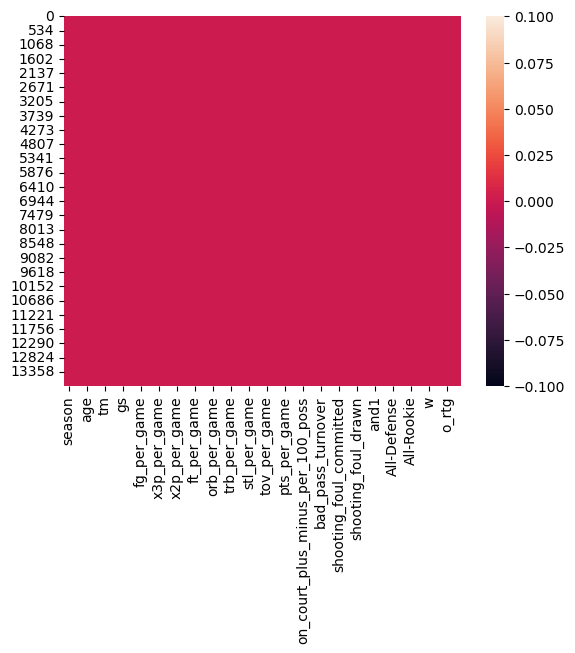

In [34]:
sns.heatmap(nba_data.isnull())

In [35]:
nba_data.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,and1,fga_blocked,All-Defense,All-NBA,All-Rookie,playoffs,w,l,o_rtg,d_rtg
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,33,52,0,0,0,True,48.0,34.0,114.5,112.1
1,2022,Austin Rivers,29.0,10,DEN,67,18.0,22.1,2.2,5.2,...,4,13,0,0,0,True,48.0,34.0,114.5,112.1
2,2022,Bol Bol,22.0,3,DEN,14,0.0,5.8,1.1,1.9,...,1,1,0,0,0,True,48.0,34.0,114.5,112.1
3,2022,Bones Hyland,21.0,1,DEN,69,4.0,19.0,3.3,8.3,...,7,38,False,False,True,True,48.0,34.0,114.5,112.1
4,2022,Bryn Forbes,28.0,6,DEN,35,1.0,17.4,2.9,6.9,...,5,13,0,0,0,True,48.0,34.0,114.5,112.1


C:\Users\tomai\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mp', ylabel='Count'>

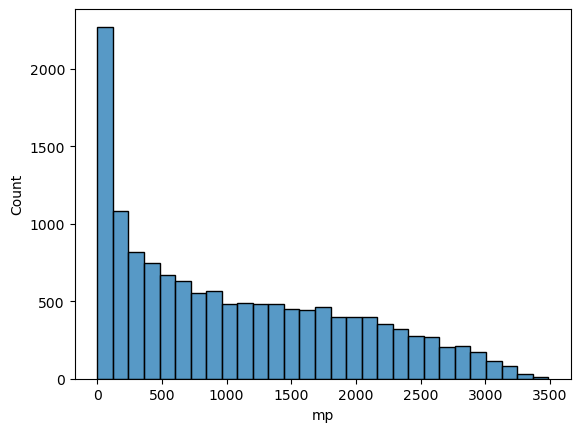

In [36]:
sns.histplot(nba_data['mp'])

In [37]:
print(nba_data[nba_data['All-NBA']==1]['mp'].mean())
print(nba_data[nba_data['All-NBA']==1]['mp'].min())
# As I can see there is a lot of low mp values and the lowest All-NBA mp is 70 so I will drop all below 70

2614.5193798449613
70


In [38]:
nba_data = nba_data[nba_data['mp']>=70]

In [39]:
nba_data.shape

(12274, 44)

In [40]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12274 entries, 0 to 13890
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season                            12274 non-null  int64  
 1   player                            12274 non-null  object 
 2   age                               12274 non-null  float64
 3   experience                        12274 non-null  int64  
 4   tm                                12274 non-null  object 
 5   g                                 12274 non-null  int64  
 6   gs                                12274 non-null  float64
 7   mp_per_game                       12274 non-null  float64
 8   fg_per_game                       12274 non-null  float64
 9   fga_per_game                      12274 non-null  float64
 10  x3p_per_game                      12274 non-null  float64
 11  x3pa_per_game                     12274 non-null  float64
 12  x2p_per_g

In [41]:
#nba_data.corr()['All-NBA']

In [42]:
#plt.figure(figsize=(9,3))
#nba_data.corr()['All-NBA'].sort_values()[:-1].plot(kind='bar')

In [43]:
def combine_player(x):
    return x['player'] +  ' ' +str(x['season'])

nba_data['player_year'] = nba_data.apply(combine_player, axis=1)


#Now I got player with year linked, so now get rid off unnecessary team, season, player name and player_id
#And I delete additional data which is in another table

In [44]:
nba_data = nba_data.drop(['player','season'],axis=1)

Text(0.5, 1.0, 'Points/Minutes All-Rookie')

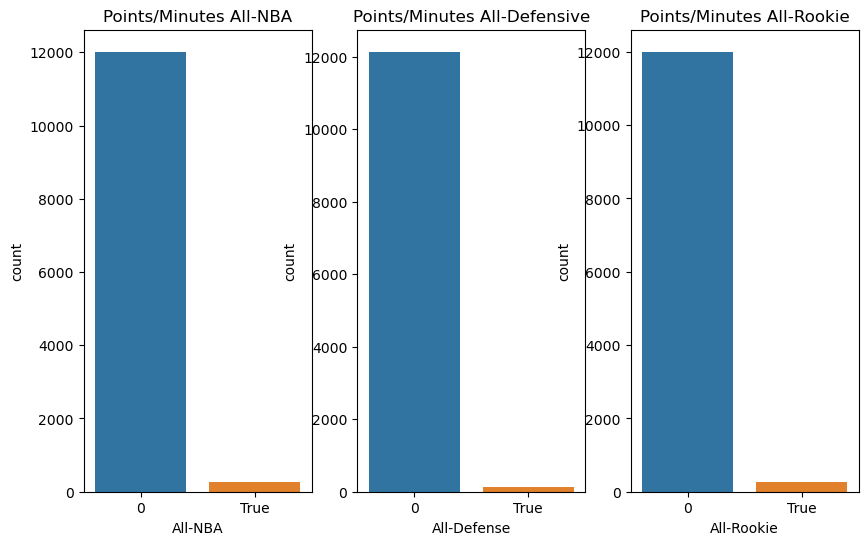

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
j=0
for i in ['All-NBA', 'All-Defense','All-Rookie']:
    sns.countplot(x=nba_data[i],ax=axes[j])
    j+=1
axes[0].set_title('Points/Minutes All-NBA')
axes[1].set_title('Points/Minutes All-Defensive')
axes[2].set_title('Points/Minutes All-Rookie')
#As I can see All teams are anomalies in the dataset

In [46]:
print(nba_data.groupby('All-NBA').count()['age'])
print(nba_data.groupby('All-Defense').count()['age'])
print(nba_data.groupby('All-Rookie').count()['age'])

All-NBA
0       12016
True      258
Name: age, dtype: int64
All-Defense
0       12140
True      134
Name: age, dtype: int64
All-Rookie
0       12002
True      272
Name: age, dtype: int64


In [47]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12274 entries, 0 to 13890
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               12274 non-null  float64
 1   experience                        12274 non-null  int64  
 2   tm                                12274 non-null  object 
 3   g                                 12274 non-null  int64  
 4   gs                                12274 non-null  float64
 5   mp_per_game                       12274 non-null  float64
 6   fg_per_game                       12274 non-null  float64
 7   fga_per_game                      12274 non-null  float64
 8   x3p_per_game                      12274 non-null  float64
 9   x3pa_per_game                     12274 non-null  float64
 10  x2p_per_game                      12274 non-null  float64
 11  x2pa_per_game                     12274 non-null  float64
 12  ft_per_ga

# Classificator 

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [49]:
nba_data['playoffs'] = nba_data['playoffs'].map({True:1,False:0})
nba_data['All-Defense'] = nba_data['All-Defense'].map({True:1,False:0})
nba_data['All-NBA'] = nba_data['All-NBA'].map({True:1,False:0})
nba_data['All-Rookie'] = nba_data['All-Rookie'].map({True:1,False:0})

In [97]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

X = nba_data.drop(['All-NBA','tm','player_year'],axis=1).values
y = nba_data['All-NBA'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [106]:
nn_model = Sequential()

nn_model.add(Dense(43,activation='relu'))
nn_model.add(Dense(21,activation='relu'))
nn_model.add(Dense(10,activation='relu'))
#nn_model.add(Dense(5,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',optimizer='adam')

In [107]:
nn_model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
269/269 [==============================] - 1s 3ms/step - loss: 0.1192 - val_loss: 0.0541
Epoch 2/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0469 - val_loss: 0.0433
Epoch 3/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0409 - val_loss: 0.0399
Epoch 4/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0405 - val_loss: 0.0411
Epoch 5/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0390 - val_loss: 0.0380
Epoch 6/100
269/269 [==============================] - 1s 3ms/step - loss: 0.0382 - val_loss: 0.0397
Epoch 7/100
269/269 [==============================] - 1s 3ms/step - loss: 0.0378 - val_loss: 0.0389
Epoch 8/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0387 - val_loss: 0.0385
Epoch 9/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0369 - val_loss: 0.0387
Epoch 10/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0374 - val_lo

116/116 [==============================] - 0s 1ms/step


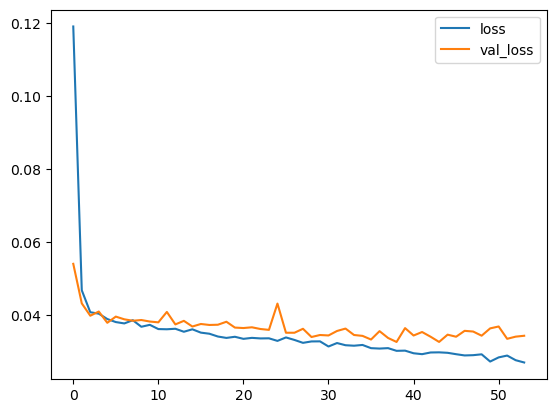

In [108]:
model_loss = pd.DataFrame(nn_model.history.history).plot()
nn_preds = (nn_model.predict(X_test)>0.5)*1

In [109]:
print(classification_report(y_test,nn_preds))
print(confusion_matrix(y_test,nn_preds))      

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3598
           1       0.67      0.73      0.70        85

    accuracy                           0.99      3683
   macro avg       0.83      0.86      0.84      3683
weighted avg       0.99      0.99      0.99      3683

[[3567   31]
 [  23   62]]


This model tends to have more instances of overshooting, meaning it incorrectly assigns more observations to the positive class (All-NBA), but it also tends to guess the positive class more frequently. This indicates a tendency towards more confident but often erroneous predictions compared to the Random Forest model.